In [4]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [5]:
output_dir ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v4.5.2_x_factor/ciff_sam/2021_09_29_12_12_47/count_data/'

In [6]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'wasting_transition_count.csv',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

# Wasting/stunting exposure verification

In [7]:
state_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv')
state_pt.head()

Unnamed: 0     sex  year               cause            measure  \
0           0  female  2022  mild_child_wasting  state_person_time   
1           1  female  2022  mild_child_wasting  state_person_time   
2           2  female  2022  mild_child_wasting  state_person_time   
3           3  female  2022  mild_child_wasting  state_person_time   
4           4  female  2022  mild_child_wasting  state_person_time   

   input_draw  scenario  x_factor_effect      value x_factor     sq_lns  \
0          29  baseline              1.1   0.000000     cat2    covered   
1          29  baseline              1.1   0.000000     cat1    covered   
2          29  baseline              1.1   0.000000     cat2    covered   
3          29  baseline              1.1   0.000000     cat1    covered   
4          29  baseline              1.1  15.400411     cat2  uncovered   

  wasting_treatment             age  
0           covered  early_neonatal  
1           covered  early_neonatal  
2         uncovered  early_neonatal  
3         uncovered  early_neonatal  
4           covered  early_neonatal

In [8]:
groupby_cols = ['x_factor_effect','input_draw','sex','age','cause']

def calculate_child_growth_exposure_prevalence(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(groupby_cols).sum()[['value']].reset_index()
    if risk=='wasting':
        state_pt_exposed = state_pt.loc[state_pt.cause.str.contains('acute_malnutrition')]
        state_pt_exposed['cause'] = 'wasted'
    else:
        state_pt_exposed = state_pt.loc[state_pt.cause.isin(['cat1','cat2'])]
        state_pt_exposed['cause'] = 'stunted'
    state_pt_with_exposed = (pd.concat([state_pt, 
                          state_pt_exposed.groupby(groupby_cols).sum().reset_index()],
                         ignore_index=True)
                .set_index(groupby_cols))
    prev = state_pt_with_exposed / state_pt.groupby([c for c in groupby_cols if c != 'cause']).sum()
    prev = prev.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975]).sort_index()
    return prev

In [9]:
wasting_prev = calculate_child_growth_exposure_prevalence('wasting')
wasting_prev.head()

/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


value  \
                                                               count   
x_factor_effect sex    age        cause                                
1.1             female 1-5_months mild_child_wasting            12.0   
                                  moderate_acute_malnutrition   12.0   
                                  severe_acute_malnutrition     12.0   
                                  susceptible_to_child_wasting  12.0   
                                  wasted                        12.0   

                                                                          \
                                                                    mean   
x_factor_effect sex    age        cause                                    
1.1             female 1-5_months mild_child_wasting            0.202115   
                                  moderate_acute_malnutrition   0.079538   
                                  severe_acute_malnutrition     0.022778   
                                  susceptible_to_child_wasting  0.695569   
                                  wasted                        0.102315   

                                                                          \
                                                                     std   
x_factor_effect sex    age        cause                                    
1.1             female 1-5_months mild_child_wasting            0.003402   
                                  moderate_acute_malnutrition   0.002423   
                                  severe_acute_malnutrition     0.001829   
                                  susceptible_to_child_wasting  0.003973   
                                  wasted                        0.003913   

                                                                          \
                                                                     min   
x_factor_effect sex    age        cause                                    
1.1             female 1-5_months mild_child_wasting            0.196161   
                                  moderate_acute_malnutrition   0.075192   
                                  severe_acute_malnutrition     0.019777   
                                  susceptible_to_child_wasting  0.690478   
                                  wasted                        0.096666   

                                                                          \
                                                                    2.5%   
x_factor_effect sex    age        cause                                    
1.1             female 1-5_months mild_child_wasting            0.196586   
                                  moderate_acute_malnutrition   0.075642   
                                  severe_acute_malnutrition     0.019860   
                                  susceptible_to_child_wasting  0.690632   
                                  wasted                        0.096733   

                                                                          \
                                                                     50%   
x_factor_effect sex    age        cause                                    
1.1             female 1-5_months mild_child_wasting            0.203364   
                                  moderate_acute_malnutrition   0.079775   
                                  severe_acute_malnutrition     0.022702   
                                  susceptible_to_child_wasting  0.695162   
                                  wasted                        0.101796   

                                                                          \
                                                                   97.5%   
x_factor_effect sex    age        cause                                    
1.1             female 1-5_months mild_child_wasting            0.206362   
                                  moderate_acute_malnutrition   0.082759   
                                  severe_acute_malnutrition  

In [10]:
stunting_prev = calculate_child_growth_exposure_prevalence('stunting')
stunting_prev.head()

/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


value                                \
                                          count      mean       std       min   
x_factor_effect sex    age        cause                                         
1.1             female 1-5_months cat1     12.0  0.040992  0.004247  0.035705   
                                  cat2     12.0  0.108264  0.002517  0.104083   
                                  cat3     12.0  0.203734  0.007247  0.191827   
                                  cat4     12.0  0.647010  0.007616  0.637270   
                                  stunted  12.0  0.149256  0.005867  0.141811   

                                                                         \
                                               2.5%       50%     97.5%   
x_factor_effect sex    age        cause                                   
1.1             female 1-5_months cat1     0.036030  0.040610  0.049522   
                                  cat2     0.104314  0.108707  0.112122   
                                  cat3     0.192033  0.203831  0.214502   
                                  cat4     0.637494  0.646632  0.660111   
                                  stunted  0.142186  0.148866  0.159651   

                                                     
                                                max  
x_factor_effect sex    age        cause              
1.1             female 1-5_months cat1     0.050413  
                                  cat2     0.112123  
                                  cat3     0.215633  
                                  cat4     0.661606  
                                  stunted  0.159787

In [14]:
# artifact
from vivarium import Artifact
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start == 2020', f'age_end <= 5'])

In [15]:
def load_child_growth_artifact_prev(risk):
    data = art.load(f'risk_factor.child_{risk}.exposure').reset_index()
    data_exposed = data.loc[data.parameter.isin(['cat1','cat2'])]
    data_exposed['parameter'] = 'exposed'
    data_exposed = data_exposed.groupby([c for c in data_exposed.columns if c != 'value' and 'draw' not in c]).sum().reset_index()
    data = pd.concat([data,data_exposed], ignore_index=True)
    data = data.set_index([c for c in data.columns if 'draw' not in c])
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
    return data

In [16]:
wasting_art = load_child_growth_artifact_prev('wasting')
wasting_art.head()

/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


sex  age_start   age_end  year_start  year_end parameter      mean  \
0  female   0.000000  0.019178        2020      2021      cat1  0.023100   
1  female   0.000000  0.019178        2020      2021      cat2  0.080399   
2  female   0.000000  0.019178        2020      2021      cat3  0.200563   
3  female   0.000000  0.019178        2020      2021      cat4  0.695938   
4  female   0.019178  0.076712        2020      2021      cat1  0.023190   

       2.5%     97.5%             age  age_group  
0  0.019989  0.026792  early_neonatal          1  
1  0.076361  0.084449  early_neonatal          1  
2  0.195923  0.205312  early_neonatal          1  
3  0.687181  0.704784  early_neonatal          1  
4  0.019931  0.027105   late_neonatal          2

In [17]:
stunting_art = load_child_growth_artifact_prev('stunting')
stunting_art.head()

/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


sex  age_start   age_end  year_start  year_end parameter  mean  2.5%  \
0  female   0.000000  0.019178        2020      2021      cat1   0.0   0.0   
1  female   0.000000  0.019178        2020      2021      cat2   0.0   0.0   
2  female   0.000000  0.019178        2020      2021      cat3   0.0   0.0   
3  female   0.000000  0.019178        2020      2021      cat4   1.0   1.0   
4  female   0.019178  0.076712        2020      2021      cat1   0.0   0.0   

   97.5%             age  age_group  
0    0.0  early_neonatal          1  
1    0.0  early_neonatal          1  
2    0.0  early_neonatal          1  
3    1.0  early_neonatal          1  
4    0.0   late_neonatal          2

In [19]:
def plot_cgf_exposure(wasting_prev, wasting_art, sex, art_severity, sim_severity, title_severity):
    plt.figure(dpi=120)
    a = wasting_art.loc[wasting_art.sex==f'{sex}'].loc[wasting_art.parameter==f'{art_severity}'].reset_index()
    plt.plot(a['age'].values, a['mean'].values, marker='o', label='Artifact')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.4)

    s = wasting_prev.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                         np.where(s.age=='late_neonatal', 1,
                                 np.where(s.age=='1-5_months',2,
                                         np.where(s.age=='6-11_months',3,
                                                 np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by=['order','x_factor_effect'])
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==f'{sim_severity}']
    
    for i in s.x_factor_effect.unique():
        ss = s.loc[s.x_factor_effect==i].reset_index()

        plt.plot(ss['age'], ss['value','mean'], marker='o', label=f'X-factor: {i}')
        plt.fill_between(ss['age'], ss['value','2.5%'], ss['value','97.5%'], alpha=0.2)
    
    plt.xticks(rotation=60)
    plt.title(f'{title_severity} exposure: {sex}s')
    plt.legend()
    plt.ylabel('Proportion')
    plt.ylim(0,max(a['97.5%'])*1.25)
    plt.grid()

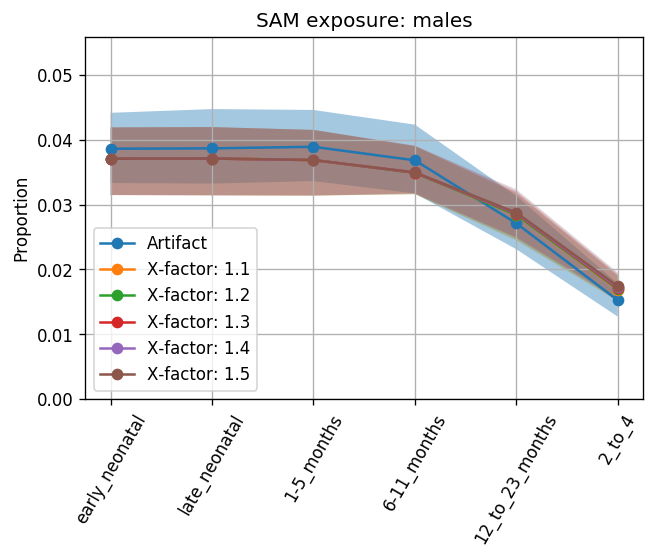

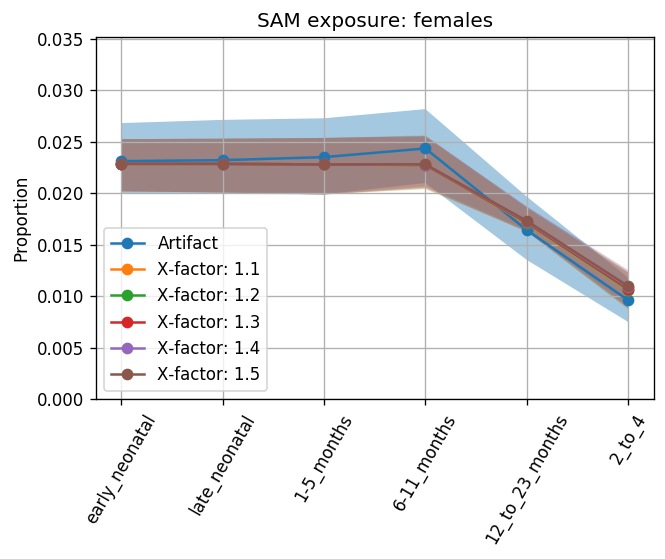

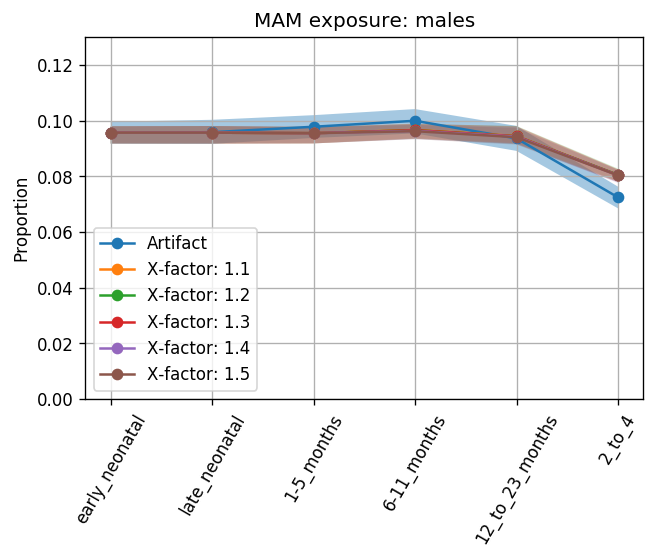

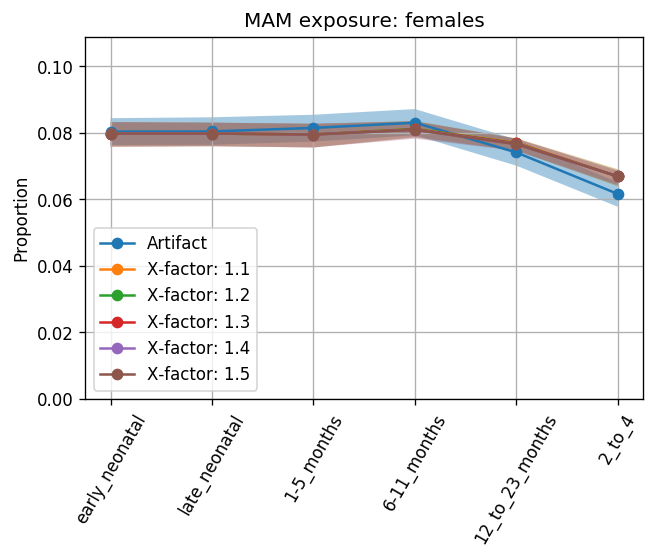

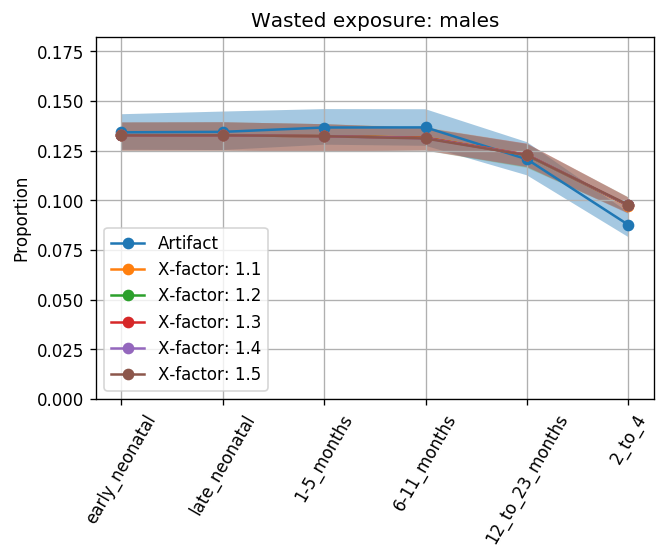

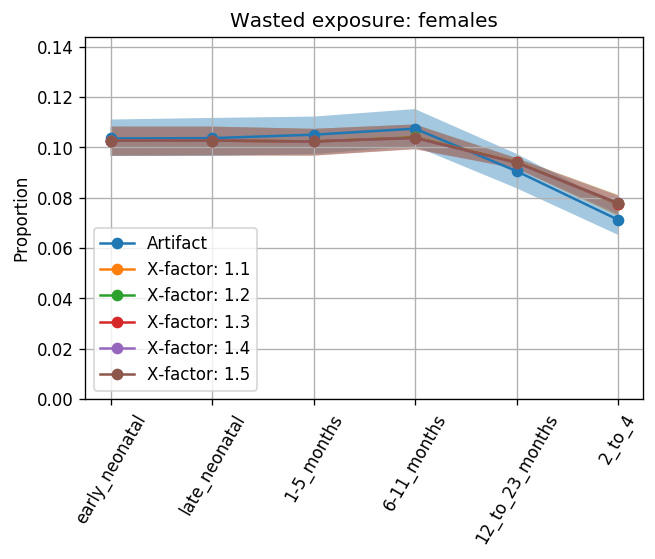

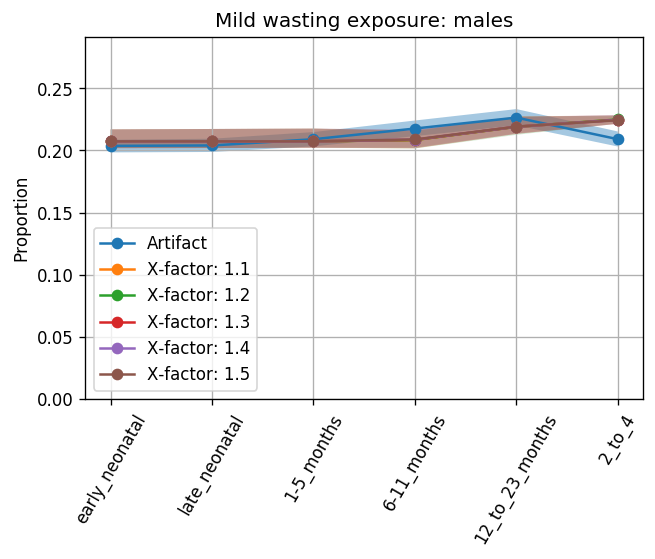

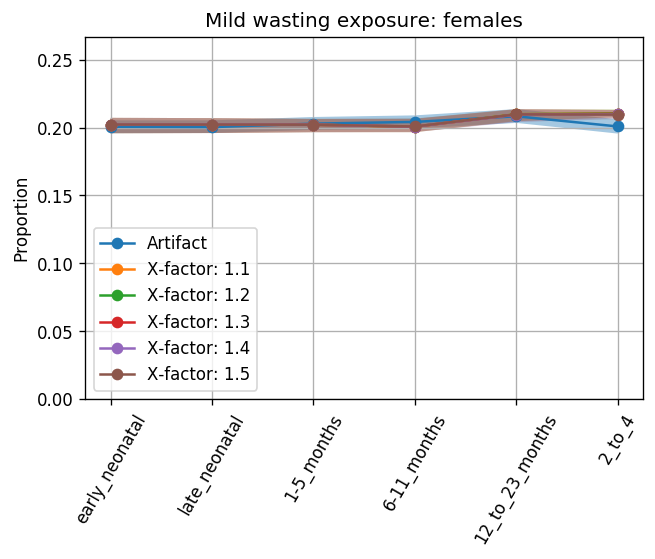

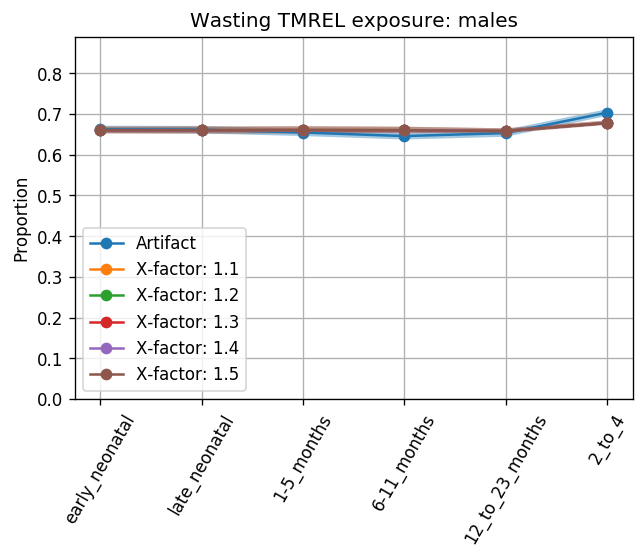

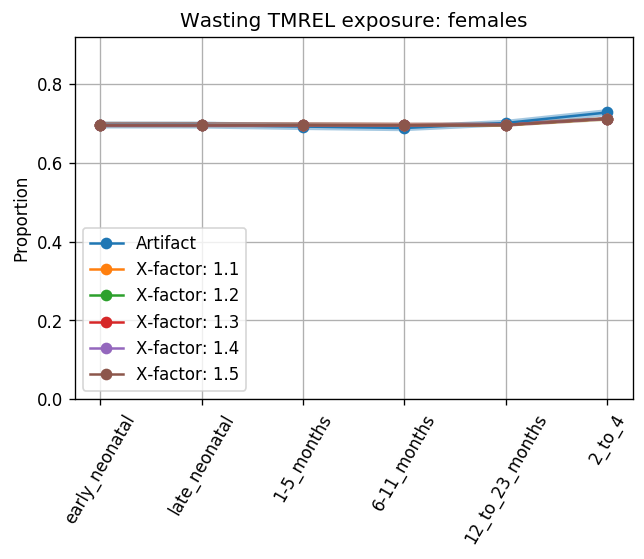

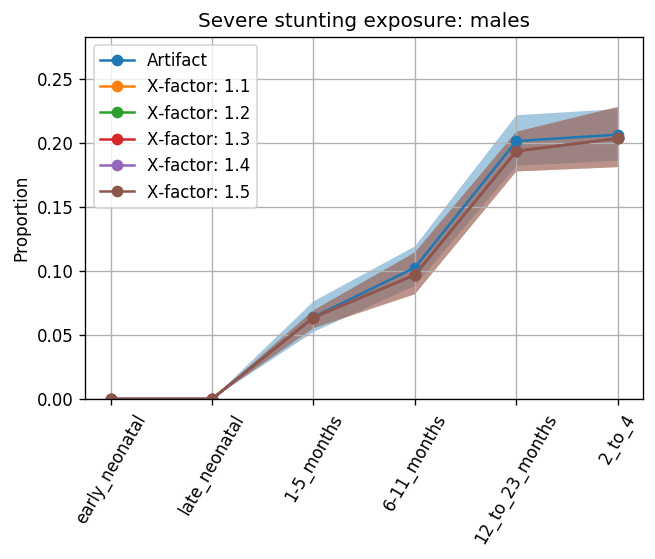

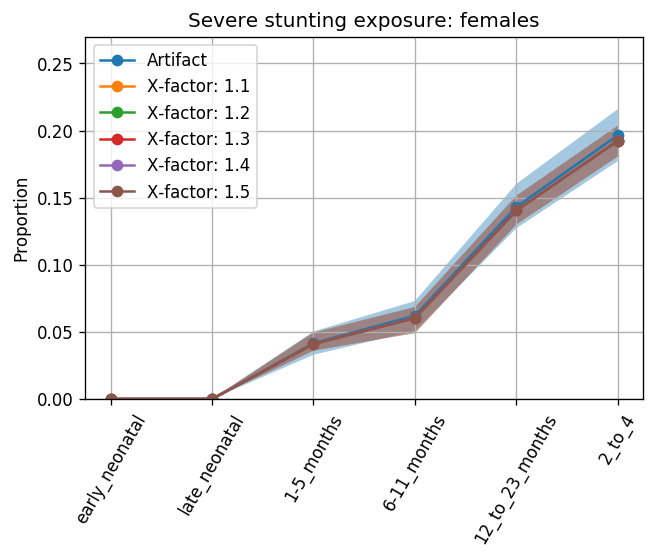

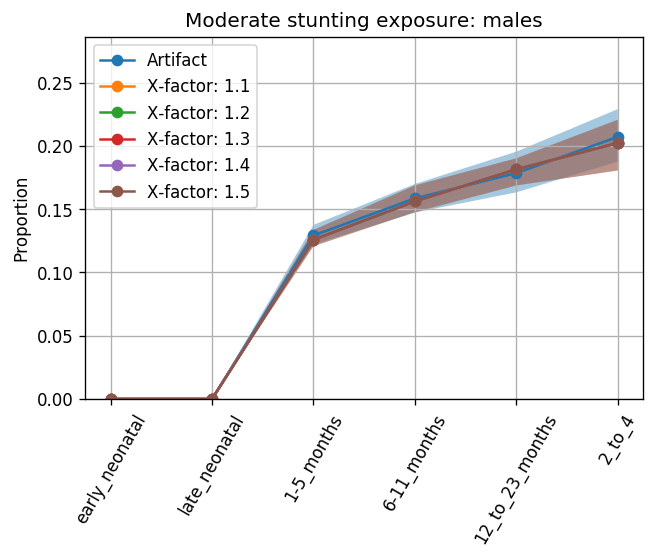

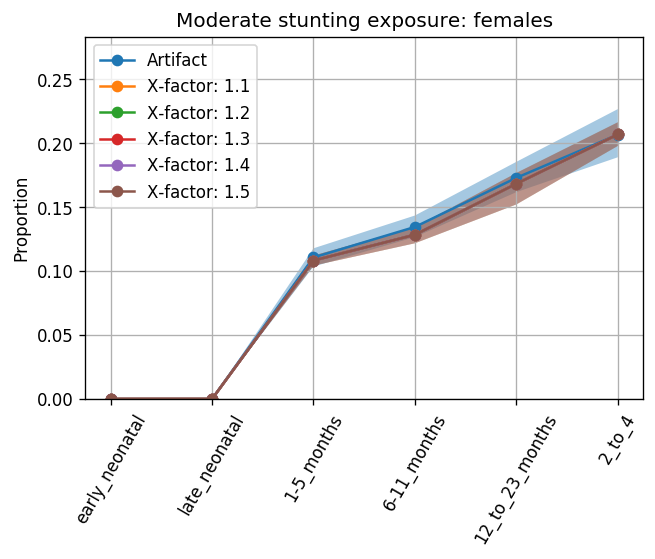

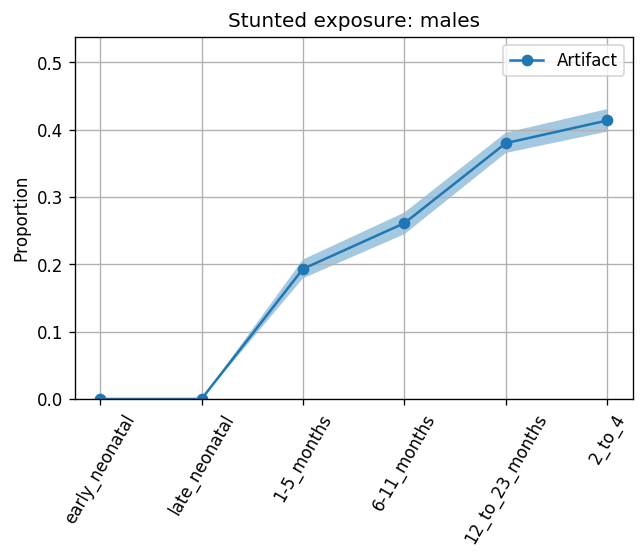

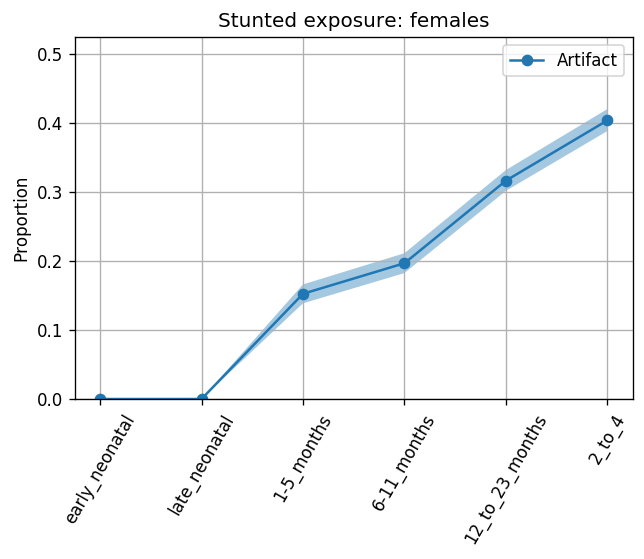

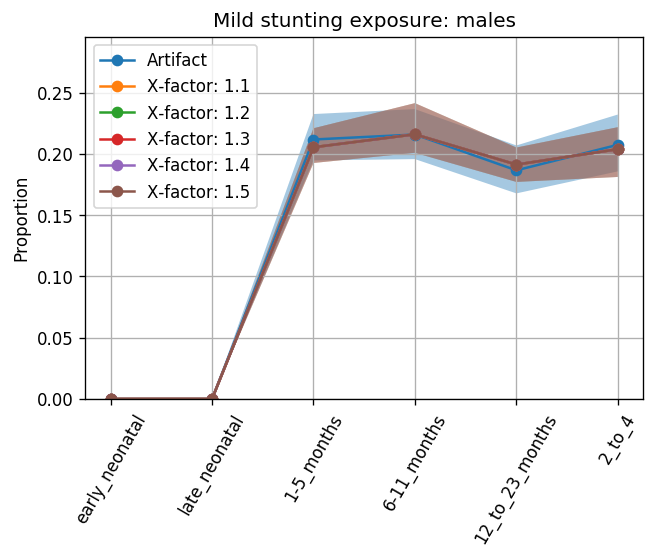

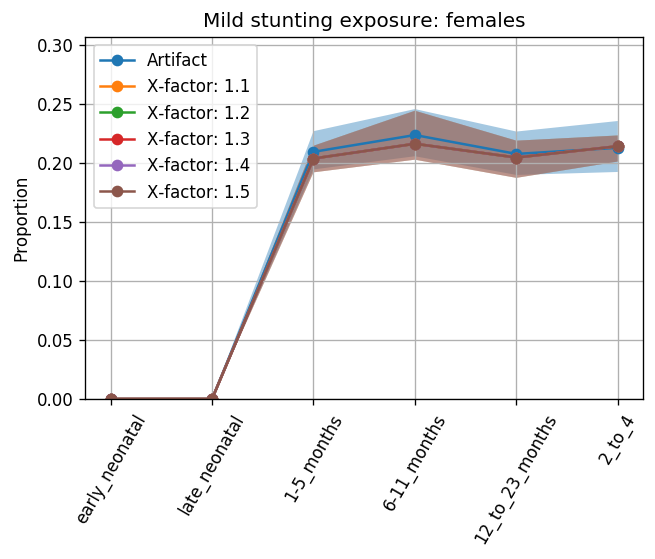

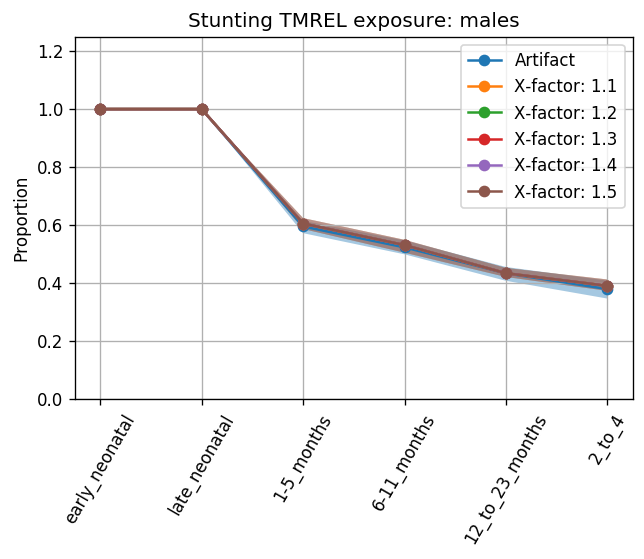

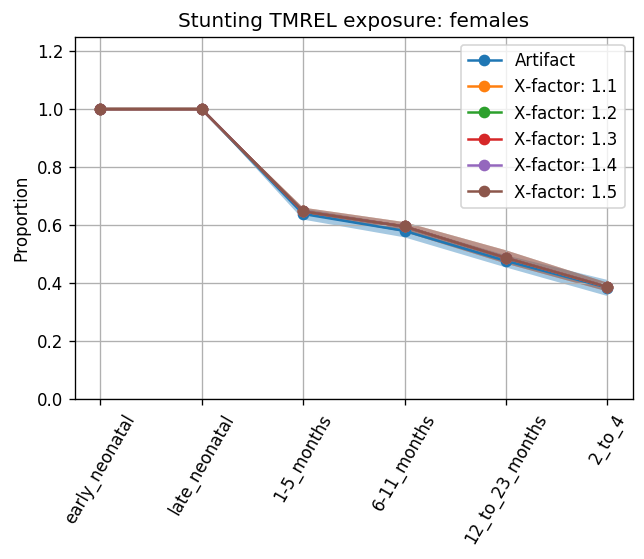

In [20]:
w_sim_cats = ['severe_acute_malnutrition','moderate_acute_malnutrition','wasted',
              'mild_child_wasting','susceptible_to_child_wasting']
art_cats = ['cat1','cat2','exposed','cat3','cat4']
w_title_cats = ['SAM','MAM','Wasted','Mild wasting','Wasting TMREL']
s_title_cats = ['Severe stunting','Moderate stunting','Stunted','Mild stunting','Stunting TMREL']

with PdfPages('model_4.5_cgf_exposure.pdf') as pdf:
    for i in list(range(0,len(art_cats))):
        for sex in ['male','female']:
            plot_cgf_exposure(wasting_prev, wasting_art, f'{sex}', art_cats[i],
                              w_sim_cats[i], w_title_cats[i])
            pdf.savefig(bbox_inches='tight')
    for i in list(range(0,len(art_cats))):
        for sex in ['male','female']:
            plot_cgf_exposure(stunting_prev, stunting_art, f'{sex}', 
                              art_cats[i], art_cats[i], s_title_cats[i])
            pdf.savefig(bbox_inches='tight')

# Cause model verification

In [22]:
def load_artifact_cause_data(measure, cause):
    data = art.load(f'cause.{cause}.{measure}')
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    data['measure'] = measure
    data['cause'] = cause
    return data

In [23]:
artifact_data = pd.DataFrame()
causes=['diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
measures=['prevalence','incidence_rate','remission_rate',
               'cause_specific_mortality_rate','excess_mortality_rate']
for cause in causes:    
    for measure in measures:
        try:
            temp = load_artifact_cause_data(measure, cause)
            artifact_data = pd.concat([artifact_data,temp], ignore_index=True)
        except:
            pass

artifact_data.head()

sex  age_start   age_end  year_start  year_end      mean      2.5%  \
0  female   0.000000  0.019178        2020      2021  0.021082  0.018352   
1  female   0.019178  0.076712        2020      2021  0.046737  0.039978   
2  female   0.076712  0.500000        2020      2021  0.045650  0.038413   
3  female   0.500000  1.000000        2020      2021  0.045650  0.038413   
4  female   1.000000  2.000000        2020      2021  0.026259  0.020612   

      97.5%              age  age_group     measure               cause  
0  0.023129   early_neonatal          1  prevalence  diarrheal_diseases  
1  0.054209    late_neonatal          2  prevalence  diarrheal_diseases  
2  0.053132       1-5_months          3  prevalence  diarrheal_diseases  
3  0.053132      6-11_months          4  prevalence  diarrheal_diseases  
4  0.033100  12_to_23_months          5  prevalence  diarrheal_diseases

In [24]:
groupby_cols = ['x_factor_effect','input_draw','sex','age']

In [25]:
state_pt = pd.read_csv(output_dir + 'disease_state_person_time.csv')
transitions = pd.read_csv(output_dir + 'disease_transition_count.csv')
deaths = pd.read_csv(output_dir + 'deaths.csv')
deaths.head()

Unnamed: 0     sex  year               cause measure  input_draw  scenario  \
0           0  female  2022  diarrheal_diseases   death          29  baseline   
1           1  female  2022  diarrheal_diseases   death          29  baseline   
2           2  female  2022  diarrheal_diseases   death          29  baseline   
3           3  female  2022  diarrheal_diseases   death          29  baseline   
4           4  female  2022  diarrheal_diseases   death          29  baseline   

   x_factor_effect  value                 wasting_state             age  
0              1.1    0.0  susceptible_to_child_wasting  early_neonatal  
1              1.1    0.0            mild_child_wasting  early_neonatal  
2              1.1    0.0   moderate_acute_malnutrition  early_neonatal  
3              1.1    0.0     severe_acute_malnutrition  early_neonatal  
4              1.1    6.0  susceptible_to_child_wasting   late_neonatal

In [26]:
def calculate_csmr():
    d = deaths.loc[deaths.scenario=='baseline']
    pem = d.loc[d.cause.str.contains('acute_malnutrition')]
    pem['cause'] = 'protein_energy_malnutrition'
    acmr = d.copy()
    acmr['cause'] = 'all_causes'
    d = pd.concat([d.loc[d.cause.isin(['diarrheal_diseases','lower_respiratory_infections','measles'])],
                  pem, acmr], ignore_index=True)
    d = d.groupby(groupby_cols + ['cause']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline'].groupby(groupby_cols).sum())
    d = ((d / pt)[['value']])
         #.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause'])
         #.describe(percentiles=[0.025,0.975]))
    return d

In [27]:
def calculate_transition_rates():
    trans = transitions.loc[transitions.scenario=='baseline']
    trans['cause'] = trans['measure'].str.split('to_', expand=True)[2].str.split('_event_count', expand=True)[0]
    trans['measure'] = np.where(trans.measure.str.contains('to_susceptible_to'),'remission','incidence')
    trans = trans.groupby(groupby_cols+['cause','measure']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline'].groupby(groupby_cols).sum())
    trans = (trans / pt)[['value']]
    trans = trans#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
    return trans

In [29]:
def calculate_prevalence(causes):
    s = state_pt.copy()
    s = s.loc[s.scenario=='baseline']
    prev = pd.DataFrame()
    for cause in causes:
        infected = state_pt.loc[state_pt.cause==cause].groupby(groupby_cols + ['cause']).sum()
        total = state_pt.loc[state_pt.cause.str.contains(cause)].groupby(groupby_cols).sum()
        temp = (infected / total)[['value']]#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
        prev = pd.concat([prev,temp])
    return prev

In [31]:
def calculate_child_growth_exposure_prevalence_by_draw(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(['input_draw','sex','age','cause']).sum()[['value']]
    prev = state_pt / state_pt.groupby(['input_draw','sex','age']).sum()
    #prev = prev.groupby(['sex','age','cause']).describe(percentiles=[0.025,0.975])
    return prev

In [32]:
csmr = calculate_csmr()
trans = calculate_transition_rates()
prev = calculate_prevalence(['diarrheal_diseases','measles','lower_respiratory_infections'])
pem_prev = calculate_child_growth_exposure_prevalence_by_draw('wasting').reset_index()
pem_prev = (pem_prev.loc[pem_prev.cause.str.contains('acute_malnutrition')]
            .groupby(['input_draw','sex','age']).sum().reset_index())
pem_prev['cause'] = 'protein_energy_malnutrition'
prev = pd.concat([prev.reset_index(), pem_prev], ignore_index=True).set_index(groupby_cols + ['cause'])
remission = trans / prev
emr = csmr / prev

prev=prev.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
trans=trans.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
remission=remission.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
emr=emr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
csmr=csmr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])

/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting b

In [33]:
def plot_cause_data(measure, cause, sex):
    
    a = artifact_data.loc[artifact_data.sex==sex].loc[artifact_data.measure==measure].loc[artifact_data.cause==cause]
    assert len(a)>0
    plt.figure(dpi=120)
    plt.plot(a['age'], a['mean'], marker='o', label='Artifact data')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.2)
    
    if measure=='cause_specific_mortality_rate':
        sim_data = csmr.copy()
    elif measure=='prevalence':
        sim_data=prev.copy()
    elif measure=='incidence_rate':
        sim_data=trans.reset_index().loc[trans.reset_index().measure=='incidence']
    elif measure=='remission_rate':
        sim_data=remission.reset_index().loc[remission.reset_index().measure=='remission']
    elif measure=='excess_mortality_rate':
        sim_data = emr.copy()
    s = sim_data.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                     np.where(s.age=='late_neonatal', 1,
                             np.where(s.age=='1-5_months',2,
                                     np.where(s.age=='6-11_months',3,
                                             np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by=['order','x_factor_effect'])
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==cause]

    for i in s.x_factor_effect.unique():
        ss = s.loc[s.x_factor_effect==i].reset_index()
        plt.plot(ss['age'], ss['value','mean'], marker='o', label=f'X-factor: {i}')
        plt.fill_between(ss['age'], ss['value','2.5%'], ss['value','97.5%'], alpha=0.2)


    plt.grid()
    plt.xticks(rotation=60)
    plt.legend()
    cause_title = cause.replace('_',' ').capitalize()
    measure_title = measure.replace('_',' ')
    plt.title(f'{cause_title} {measure_title}\n{sex.capitalize()}s')

/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retai

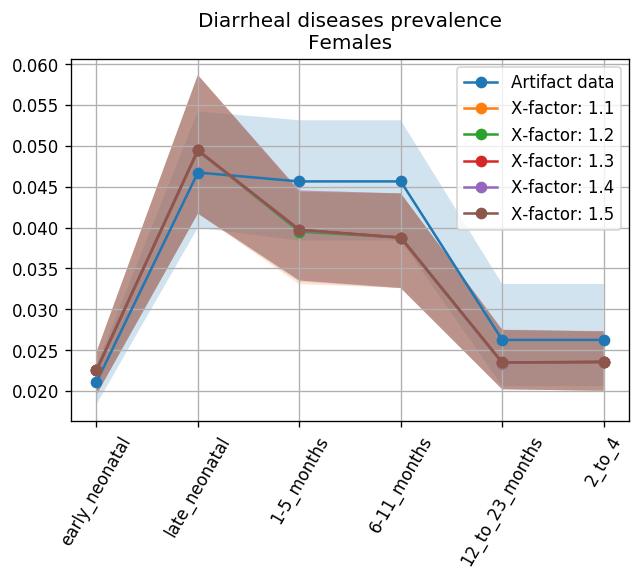

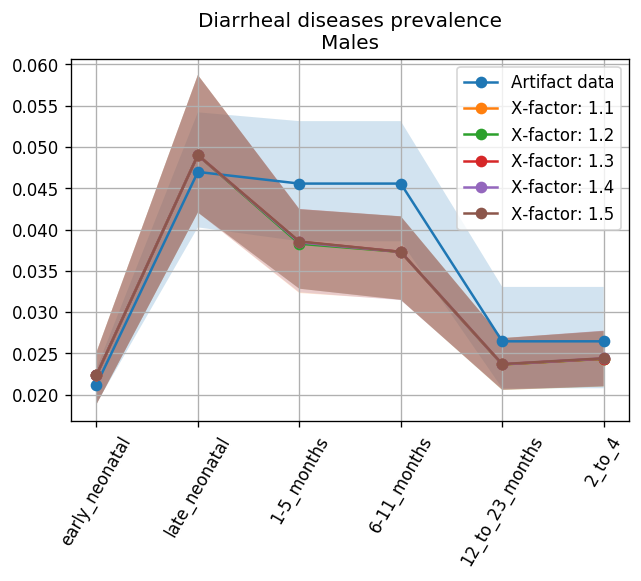

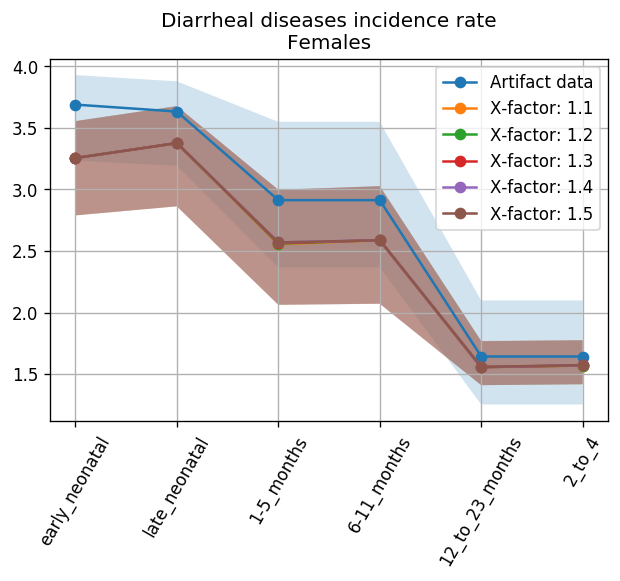

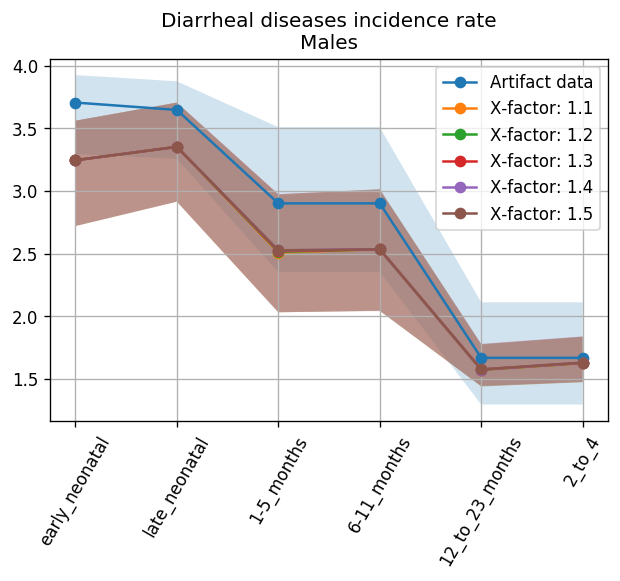

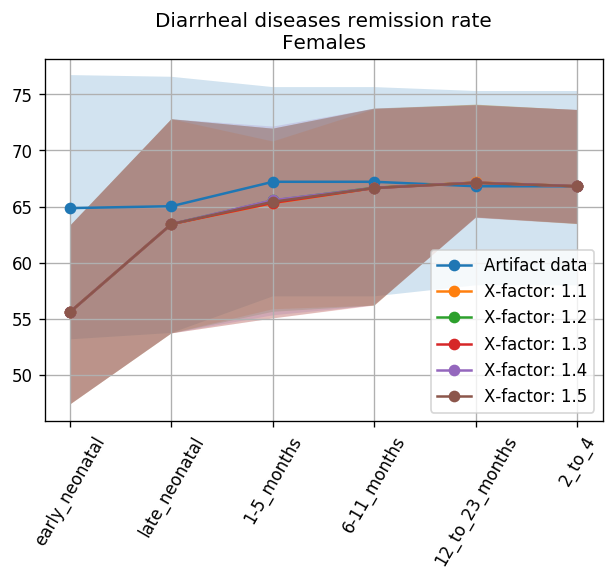

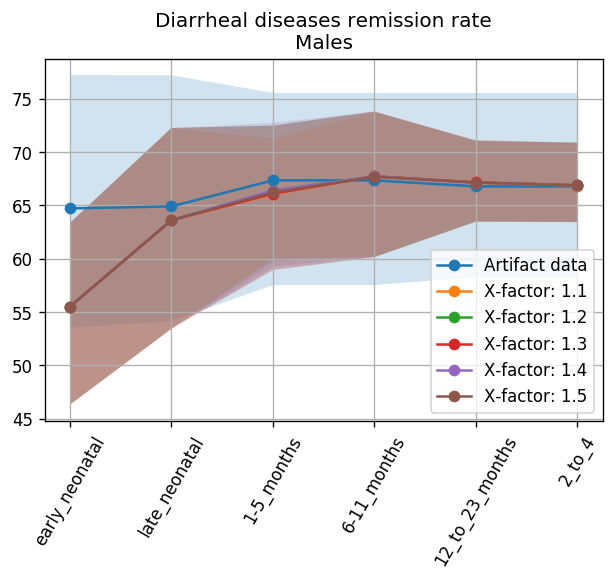

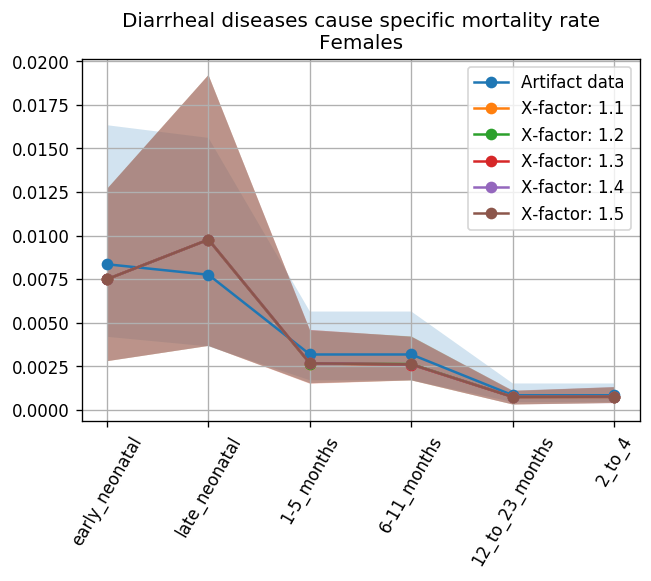

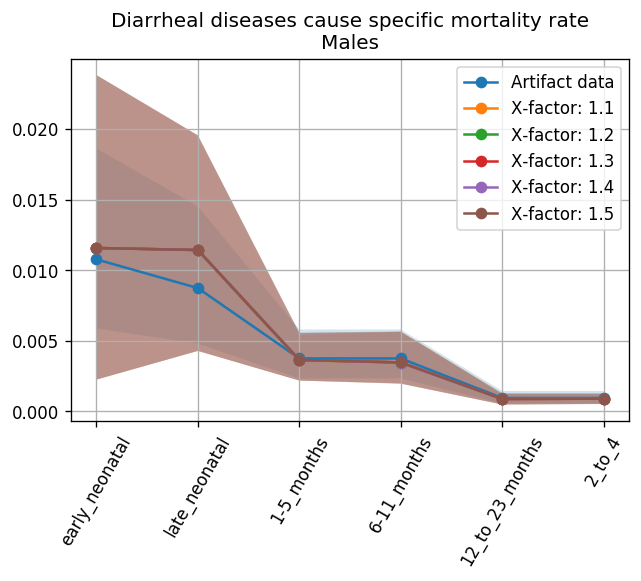

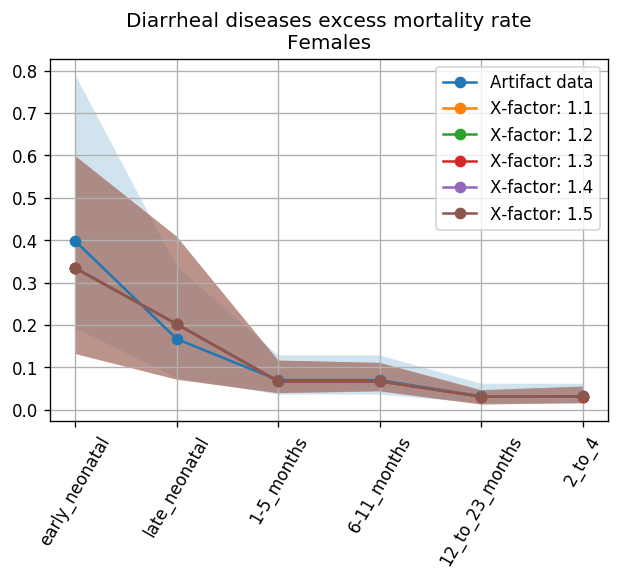

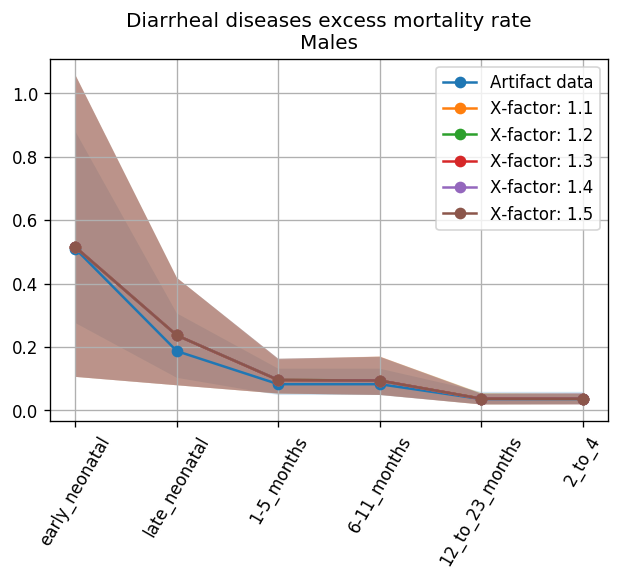

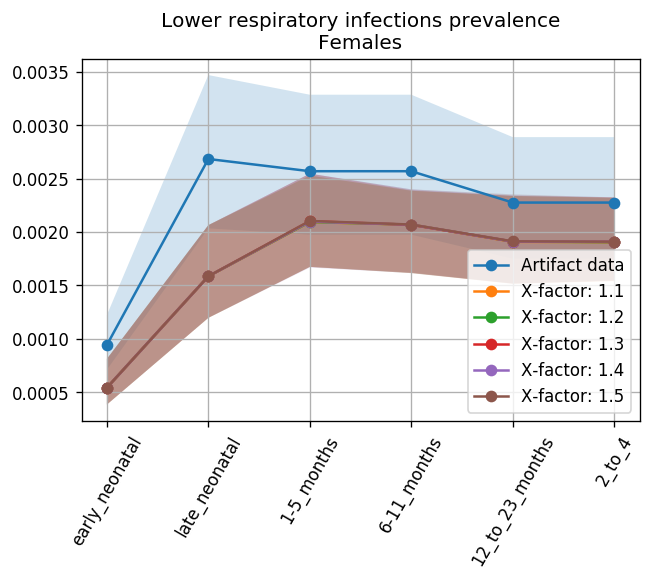

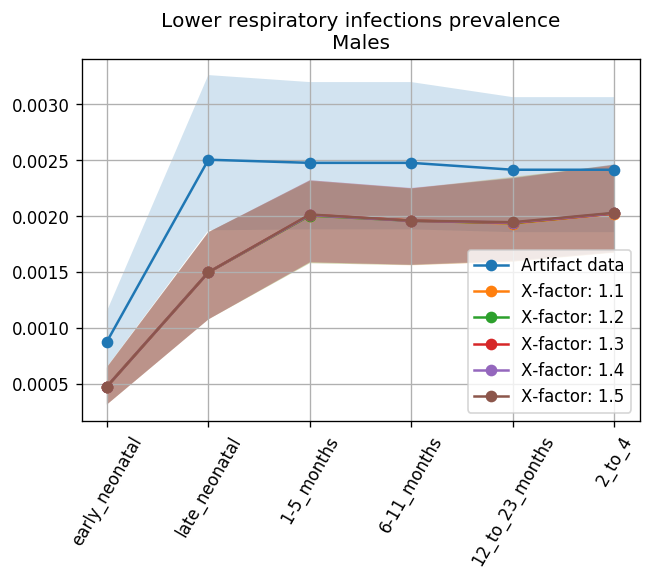

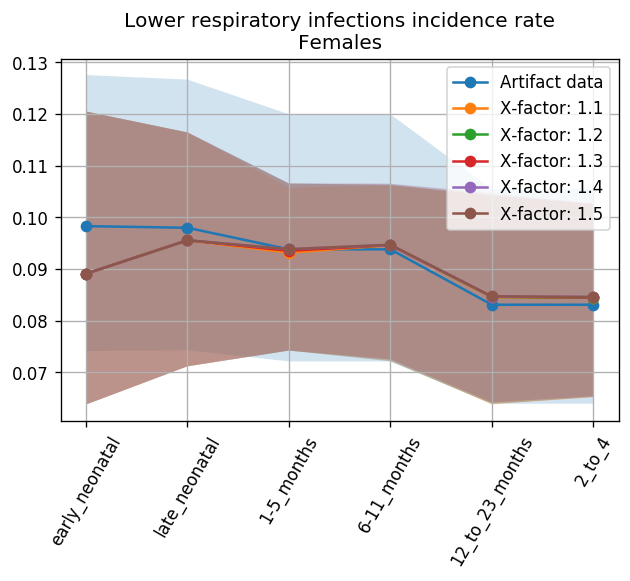

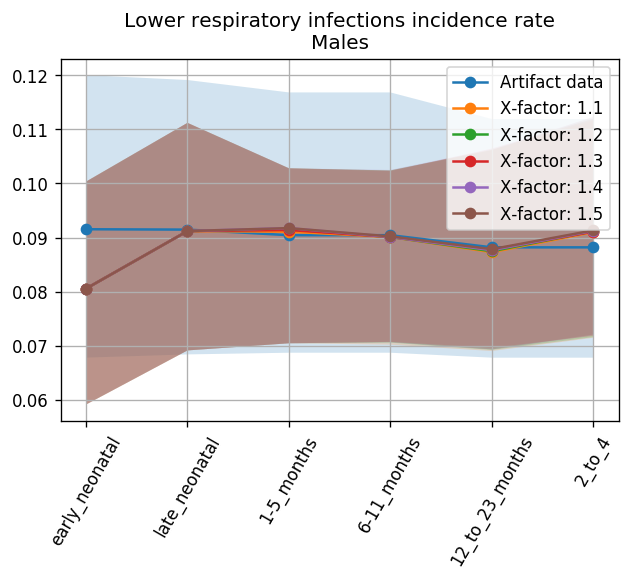

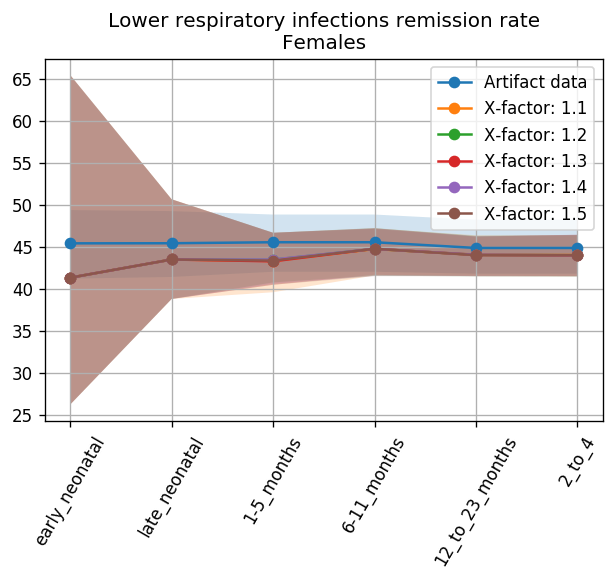

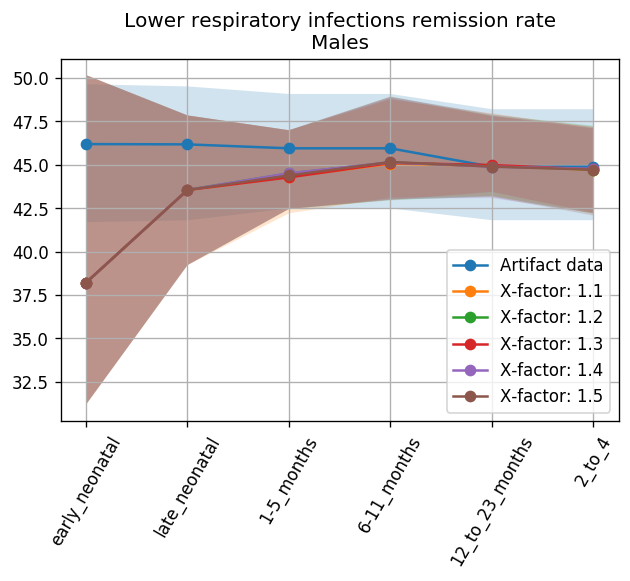

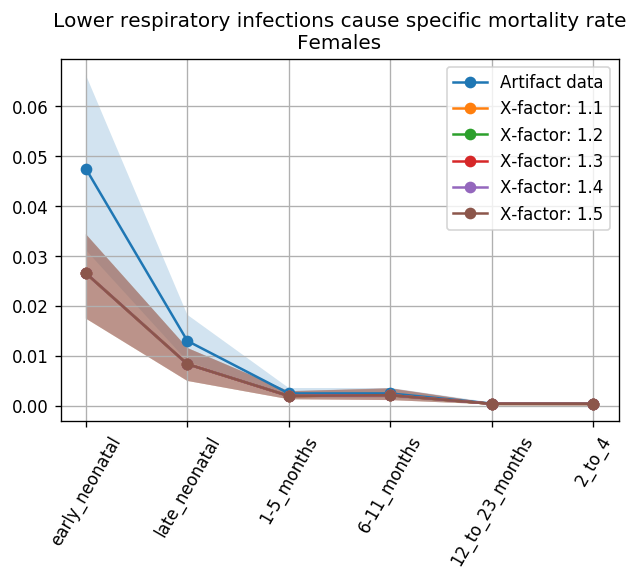

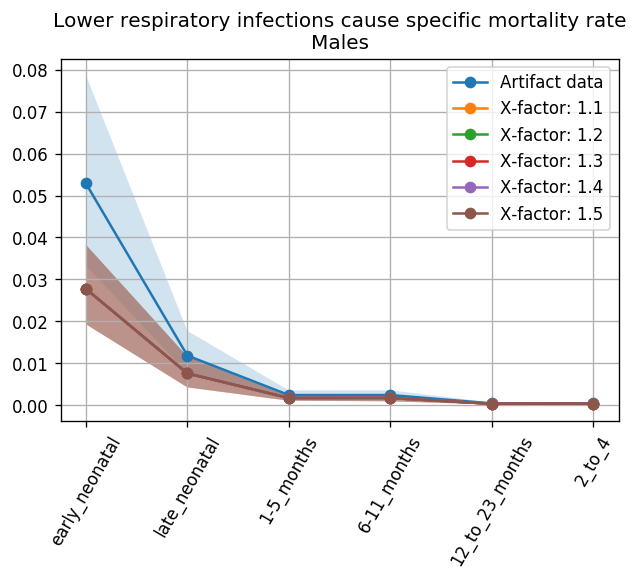

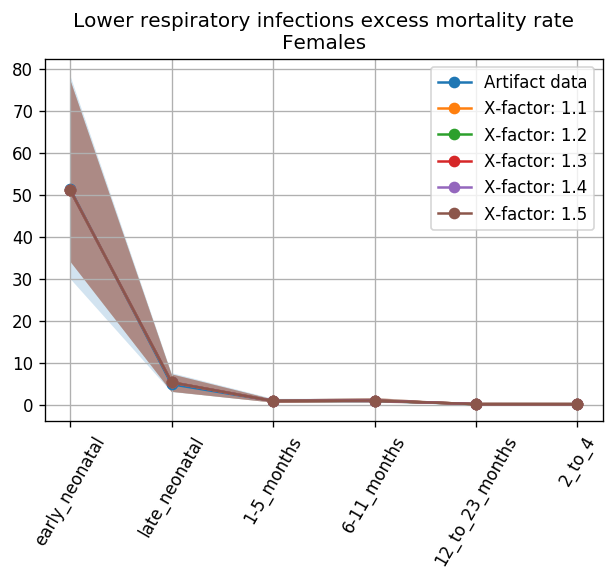

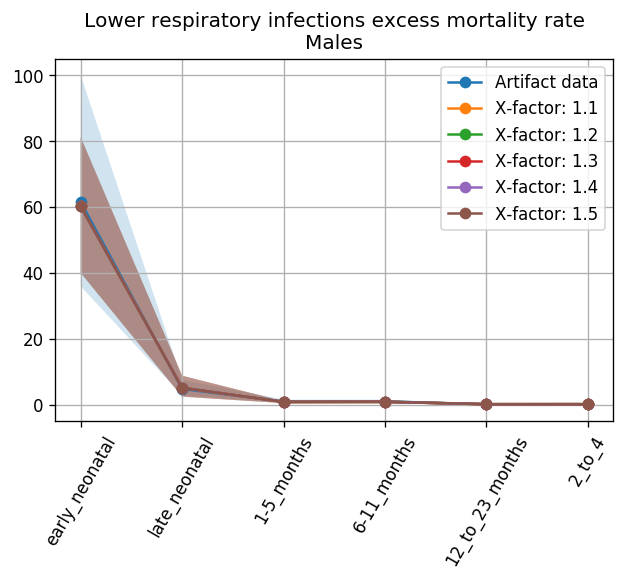

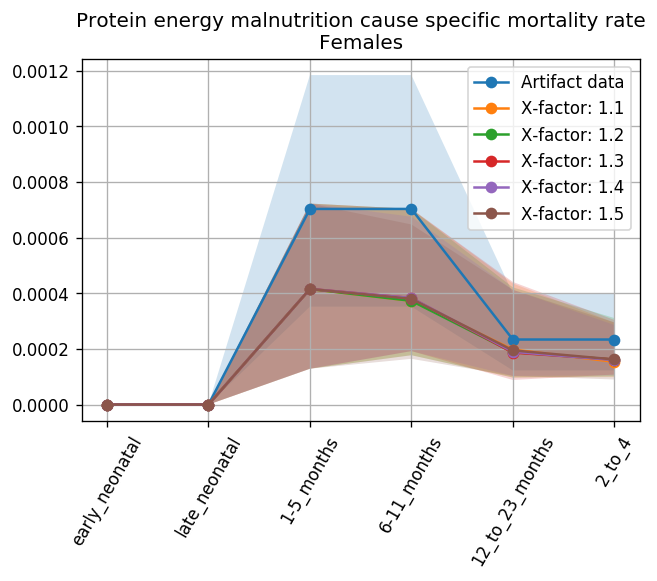

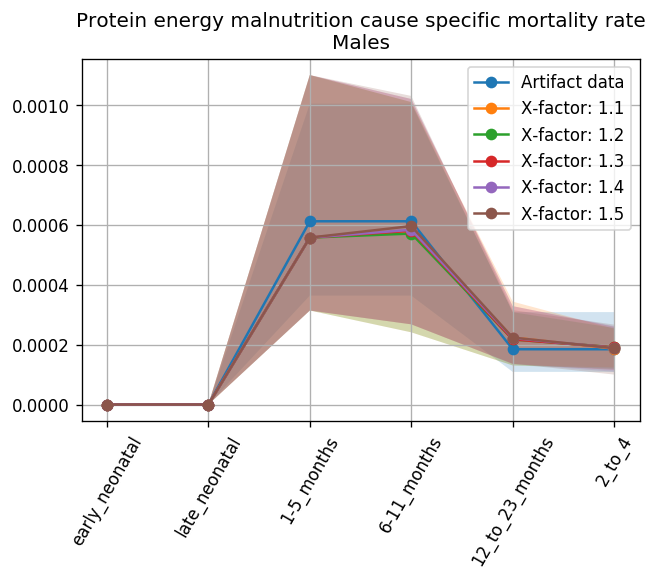

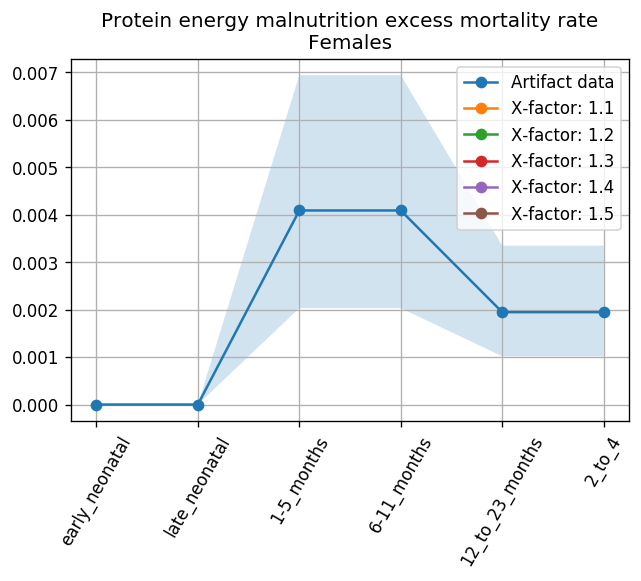

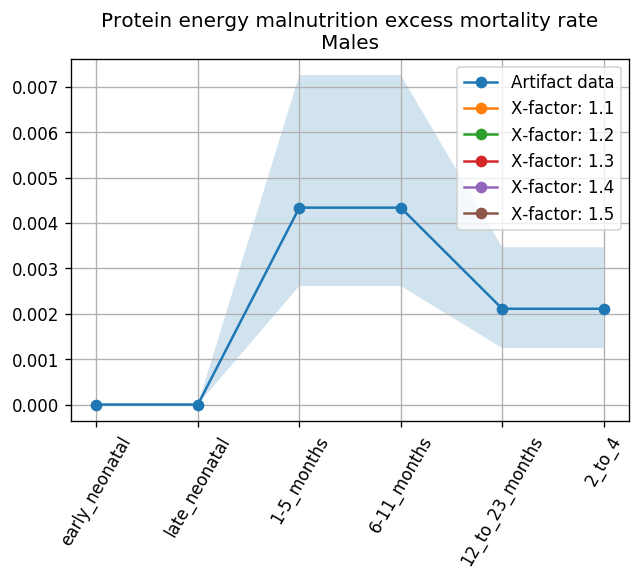

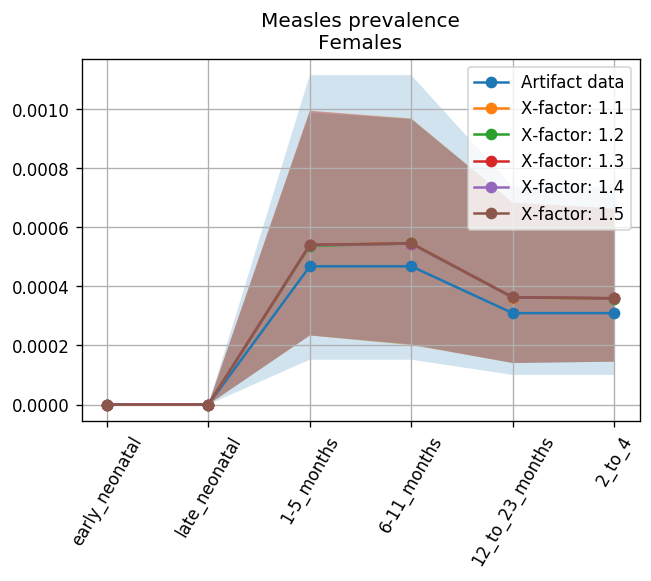

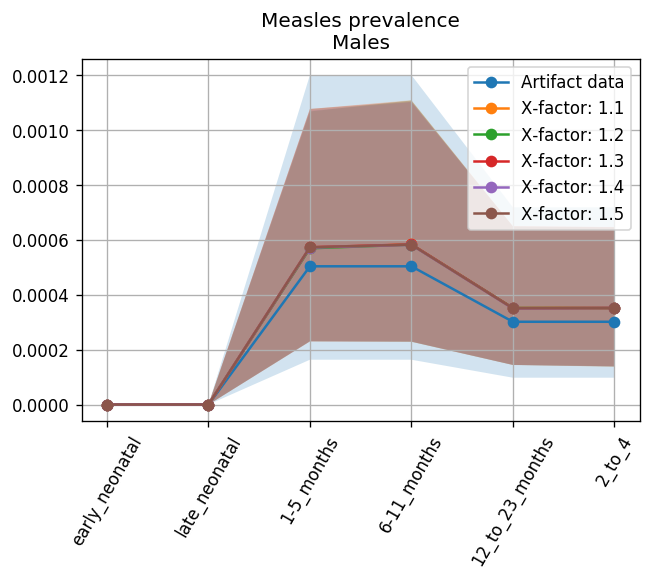

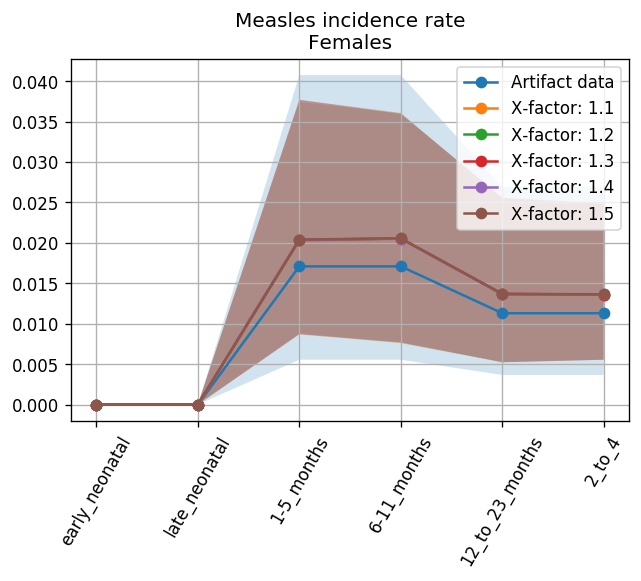

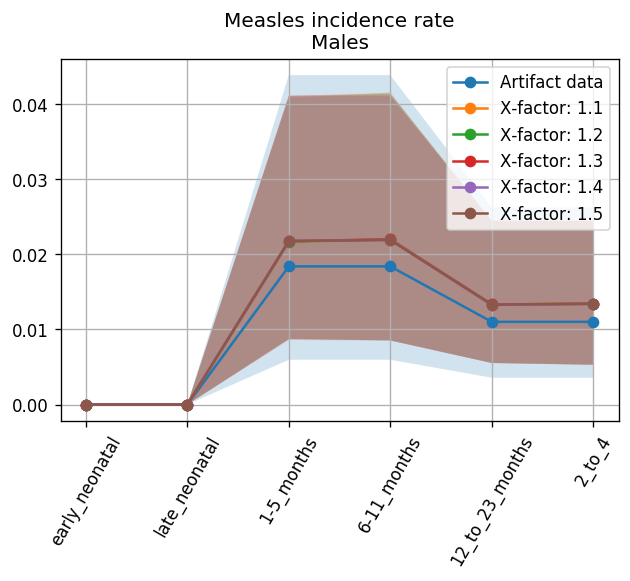

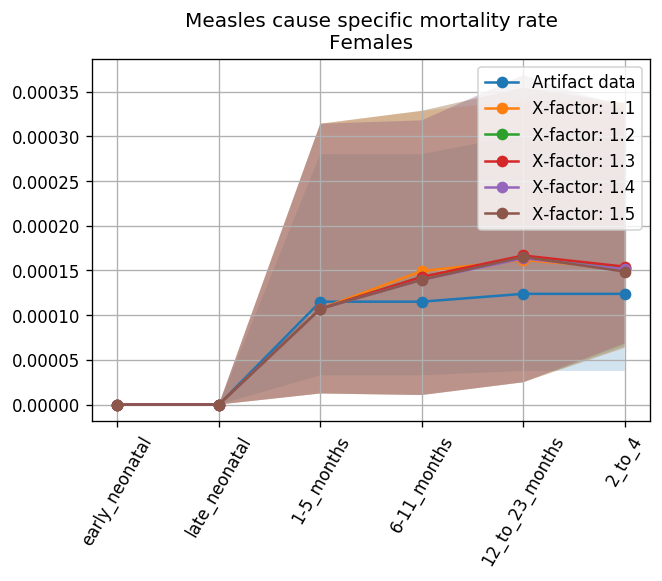

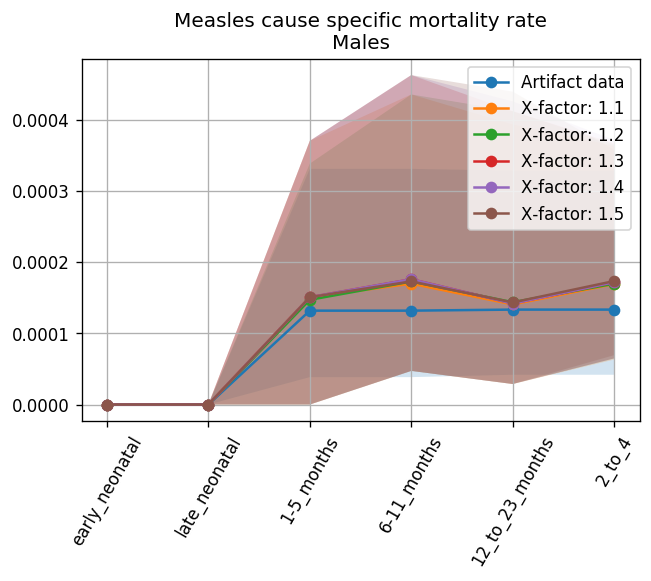

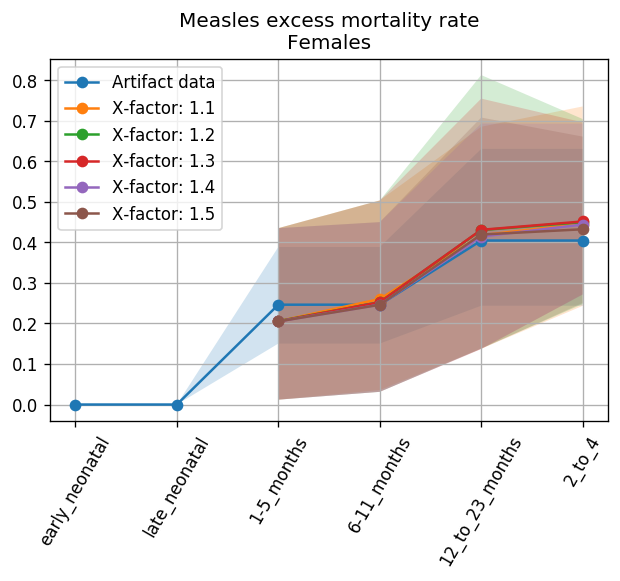

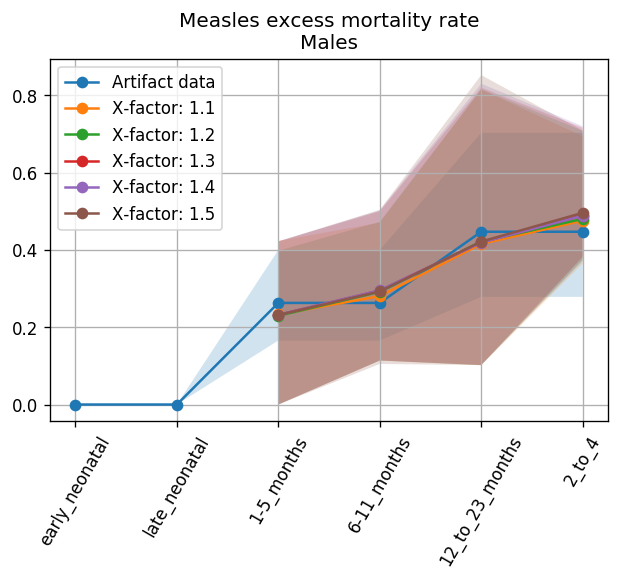

In [34]:
with PdfPages('model_4.5_cause_verification.pdf') as pdf:
    causes=['diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
    measures=['prevalence','incidence_rate','remission_rate',
                   'cause_specific_mortality_rate','excess_mortality_rate']
    for cause in causes:
        for measure in measures:
            for sex in ['female','male']:
                try:
                    plot_cause_data(measure, cause, sex)
                    pdf.savefig(bbox_inches='tight')
                except:
                    pass